In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "tabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME)
    curr_image_dir = os.path.join(const.dir.images_hp_v5(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v5(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v5(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

In [6]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

AttributeError: module 'src.constants.directories' has no attribute 'images_hp_v5'

In [23]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.837062,0.892234,0.772811,0.893575,0.652047,0.003576,0.002276,0.004485,0.003197,0.009248
1,0.05,0.838356,0.893629,0.776686,0.893981,0.659390,0.002687,0.001830,0.004229,0.002639,0.009488
2,0.10,0.838924,0.893594,0.775829,0.894719,0.656938,0.003100,0.001895,0.003365,0.002756,0.007042
3,0.15,0.838175,0.893045,0.776538,0.893880,0.659196,0.001892,0.001479,0.003063,0.001645,0.006227
4,0.20,0.838231,0.892939,0.775494,0.894130,0.656857,0.002632,0.001914,0.003370,0.002521,0.007603
5,0.25,0.838112,0.893100,0.776417,0.893842,0.658992,0.002269,0.001553,0.003013,0.001991,0.006127
6,0.30,0.838988,0.893059,0.776466,0.894666,0.658265,0.002249,0.001590,0.002630,0.001969,0.005312
7,0.35,0.838305,0.893313,0.775728,0.894170,0.657286,0.001948,0.001847,0.003631,0.001695,0.007506
8,0.40,0.838343,0.893134,0.775434,0.894270,0.656598,0.001879,0.001295,0.003126,0.001677,0.006550
9,0.45,0.839084,0.893573,0.775781,0.894896,0.656665,0.002077,0.001504,0.002832,0.001869,0.005986


  0%|          | 0/40 [00:00<?, ?it/s]

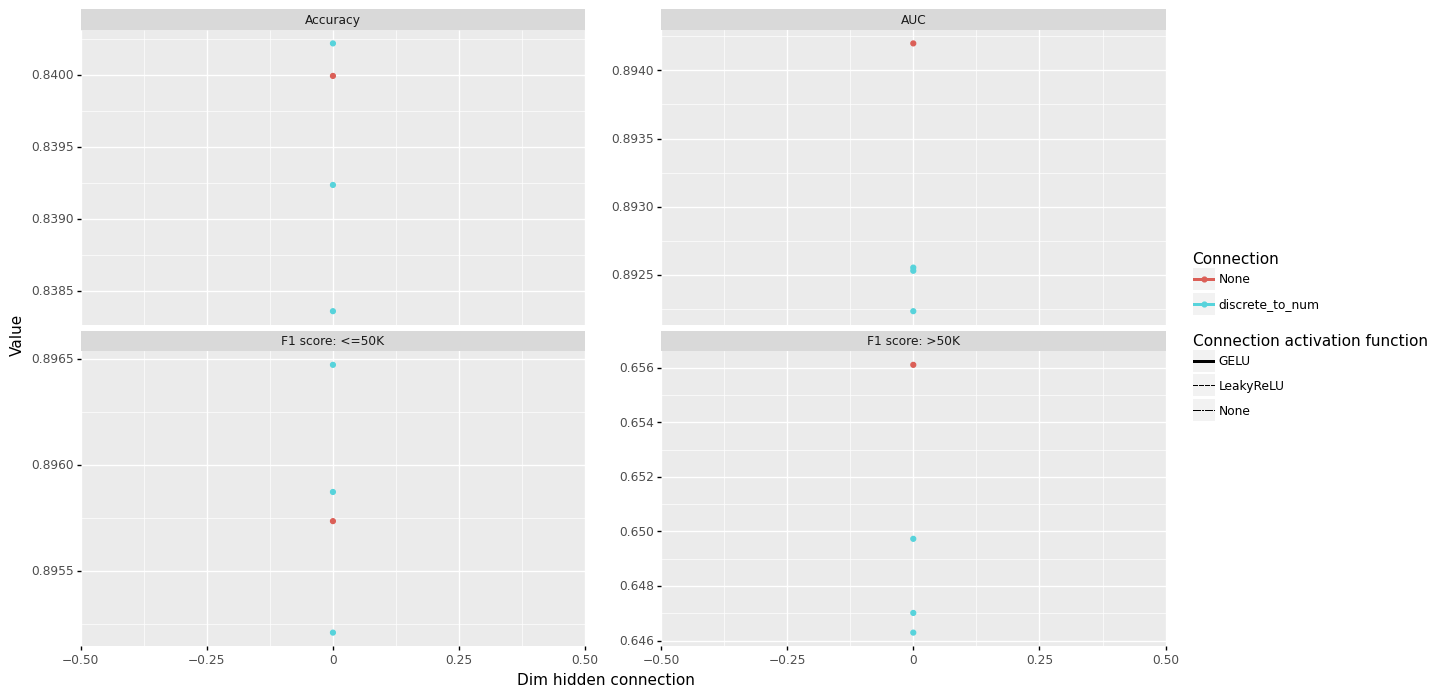

In [26]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [27]:
result_add_connection_advanced

,Dim hidden connection,Connection,Connection activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,None,0.839993,0.894197,0.775918,0.895734,0.656103,0.002421,0.001408,0.002903,0.001858,0.004934
1,0,discrete_to_num,GELU,0.839236,0.892235,0.771443,0.895871,0.647015,0.002302,0.002044,0.005679,0.002008,0.011820
2,0,discrete_to_num,LeakyReLU,0.840219,0.892555,0.773101,0.896472,0.649730,0.002141,0.001032,0.003379,0.002070,0.007680
3,0,discrete_to_num,None,0.838360,0.892532,0.770751,0.895208,0.646294,0.002128,0.001741,0.006177,0.001535,0.012395


  0%|          | 0/250 [00:00<?, ?it/s]

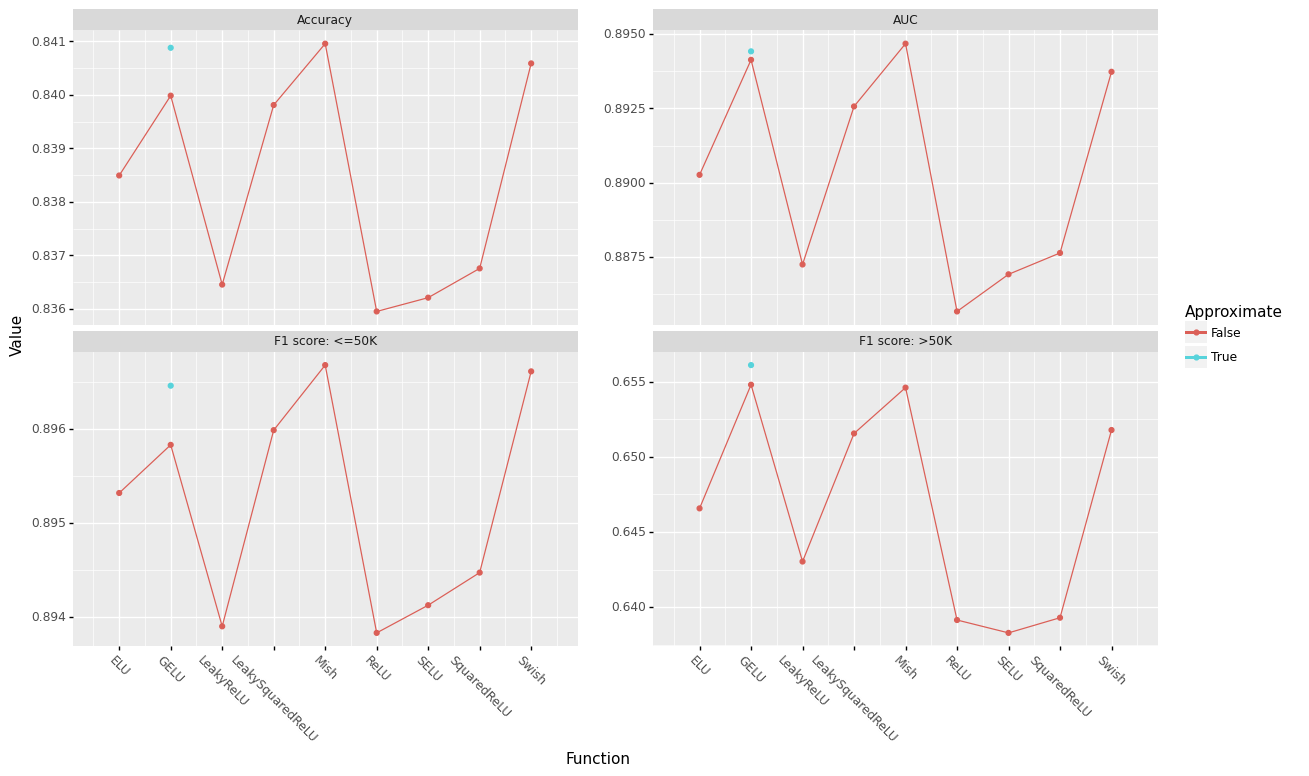

In [28]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=-45)

In [29]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.838494,0.890264,0.770947,0.895322,0.646572,0.002506,0.001754,0.003992,0.001782,0.007110
1,GELU,False,0.839987,0.894137,0.775321,0.895834,0.654808,0.002096,0.001652,0.003603,0.001771,0.007310
2,GELU,True,0.840882,0.894422,0.776290,0.896464,0.656116,0.002032,0.001615,0.004385,0.001776,0.009113
3,LeakyReLU,False,0.836454,0.887246,0.768467,0.893902,0.643031,0.002245,0.001593,0.004851,0.001778,0.009694
4,LeakySquaredReLU,False,0.839811,0.892568,0.773776,0.895991,0.651562,0.001866,0.001437,0.003015,0.001406,0.005624
5,Mish,False,0.840959,0.894681,0.775649,0.896683,0.654615,0.002183,0.001423,0.003267,0.001673,0.006034
6,ReLU,False,0.835952,0.885665,0.766484,0.893833,0.639136,0.002508,0.003391,0.004903,0.001712,0.009112
7,SELU,False,0.836210,0.886915,0.766203,0.894127,0.638279,0.002284,0.001933,0.004345,0.001514,0.007921
8,SquaredReLU,False,0.836757,0.887634,0.766882,0.894474,0.639289,0.002246,0.002224,0.005635,0.001720,0.011350
9,Swish,False,0.840590,0.893734,0.774203,0.896617,0.651790,0.002273,0.001988,0.004351,0.001693,0.008364


  0%|          | 0/450 [00:00<?, ?it/s]

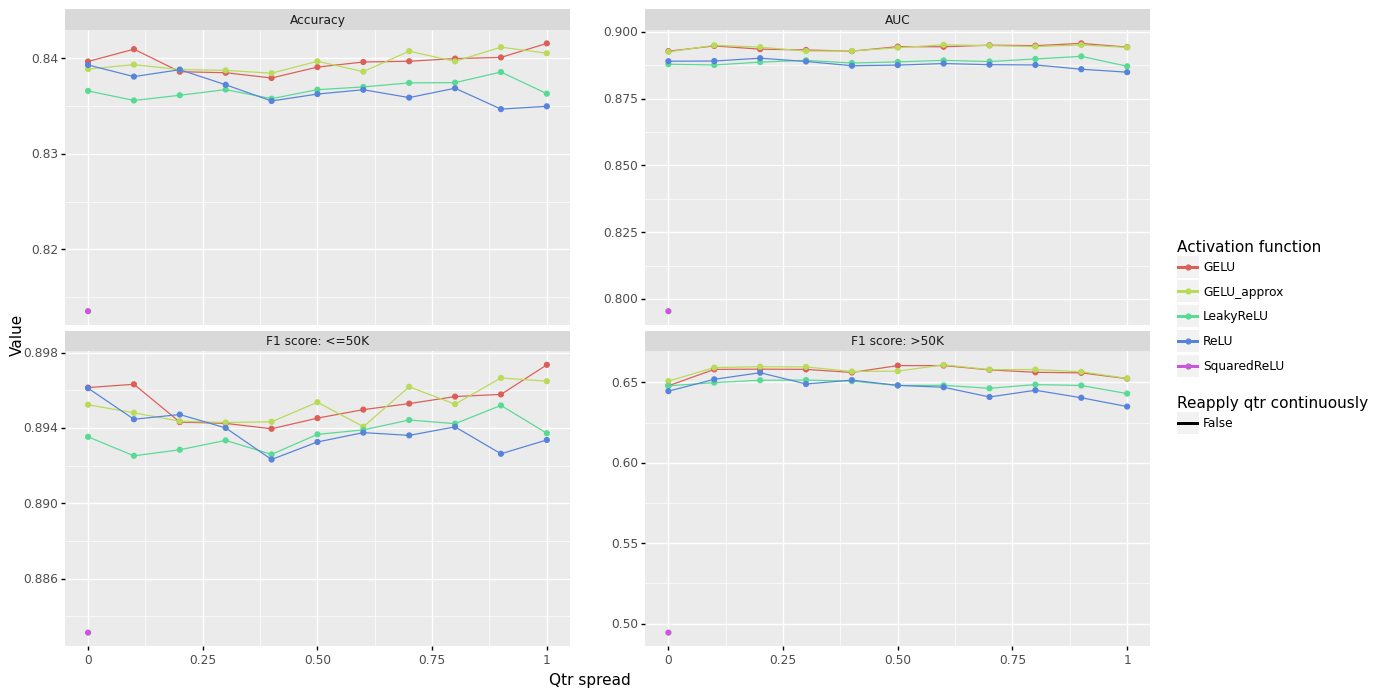

In [33]:
result_spread_and_activation = plot_hp_tuning("spread_and_activation")

  0%|          | 0/510 [00:00<?, ?it/s]

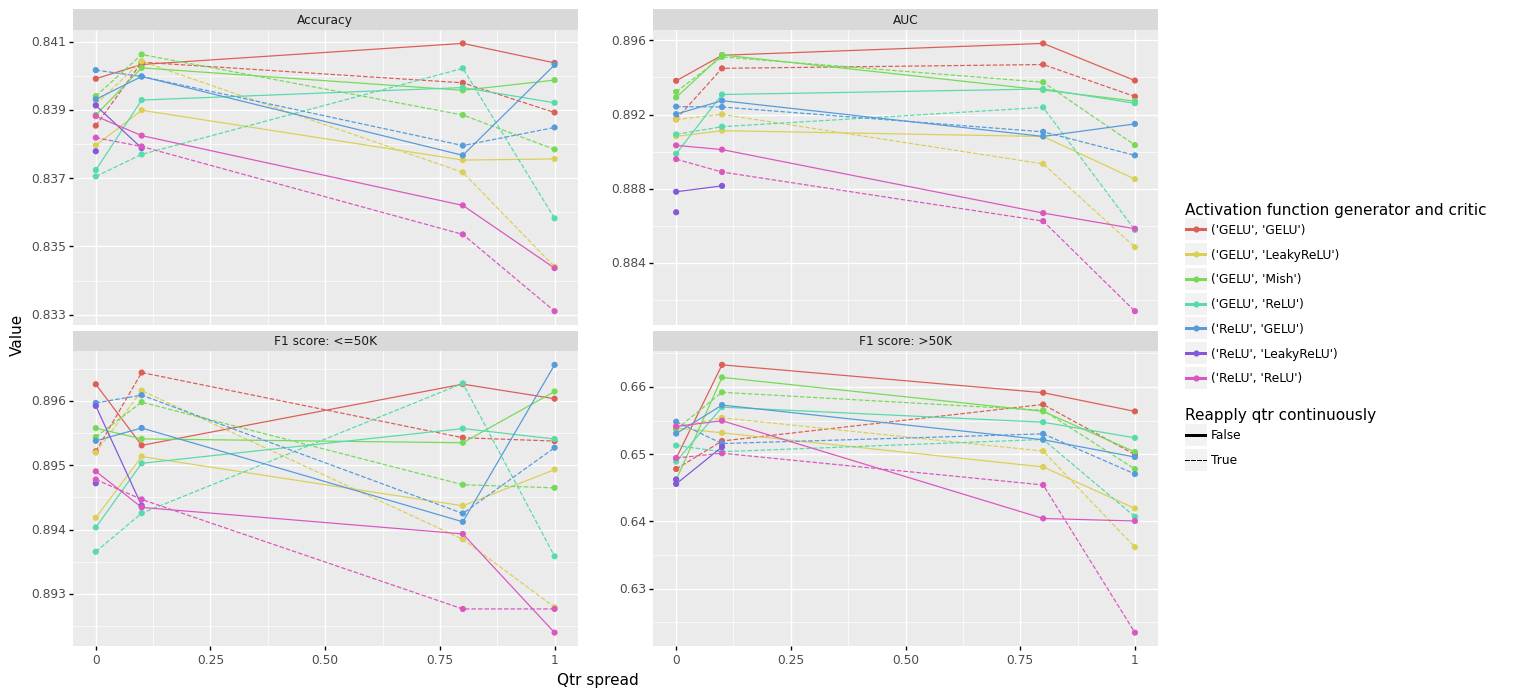

In [34]:
result_spread_and_activations = plot_hp_tuning("spread_and_activations")

  0%|          | 0/220 [00:00<?, ?it/s]

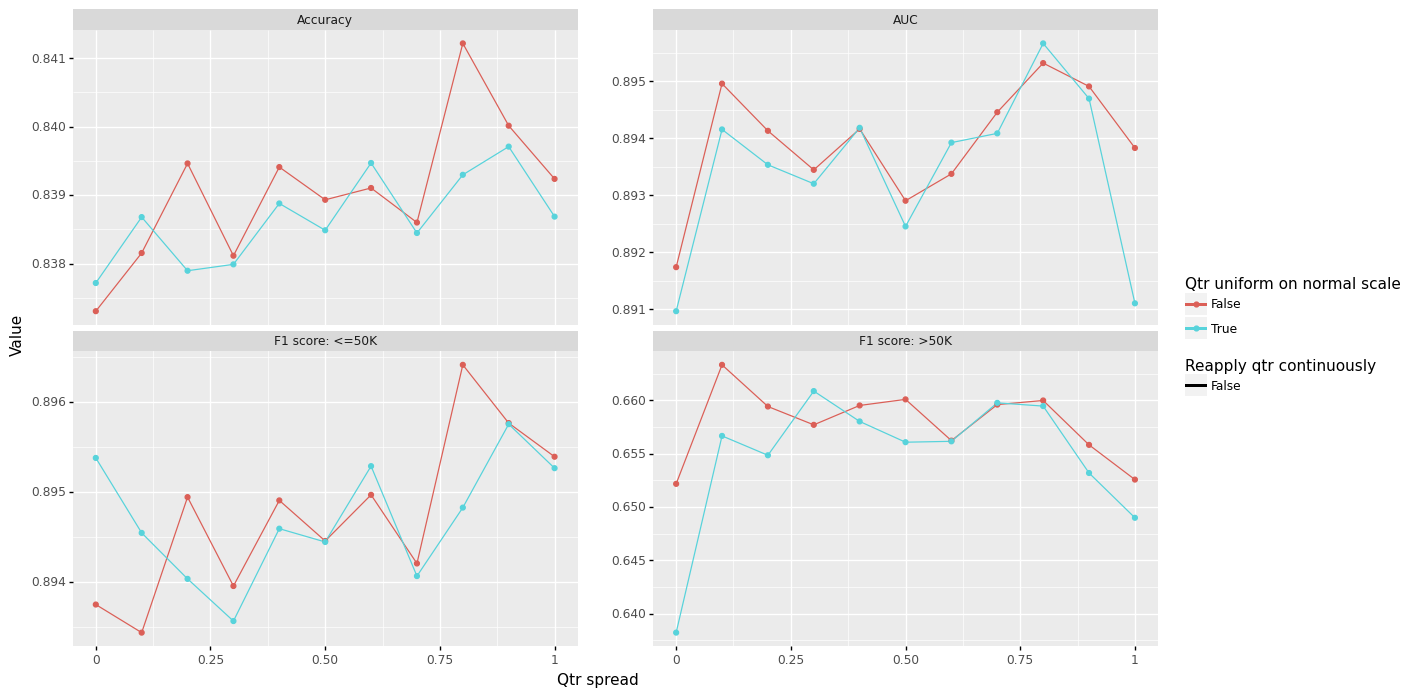

In [35]:
result_qtr = plot_hp_tuning("qtr")

  0%|          | 0/230 [00:00<?, ?it/s]

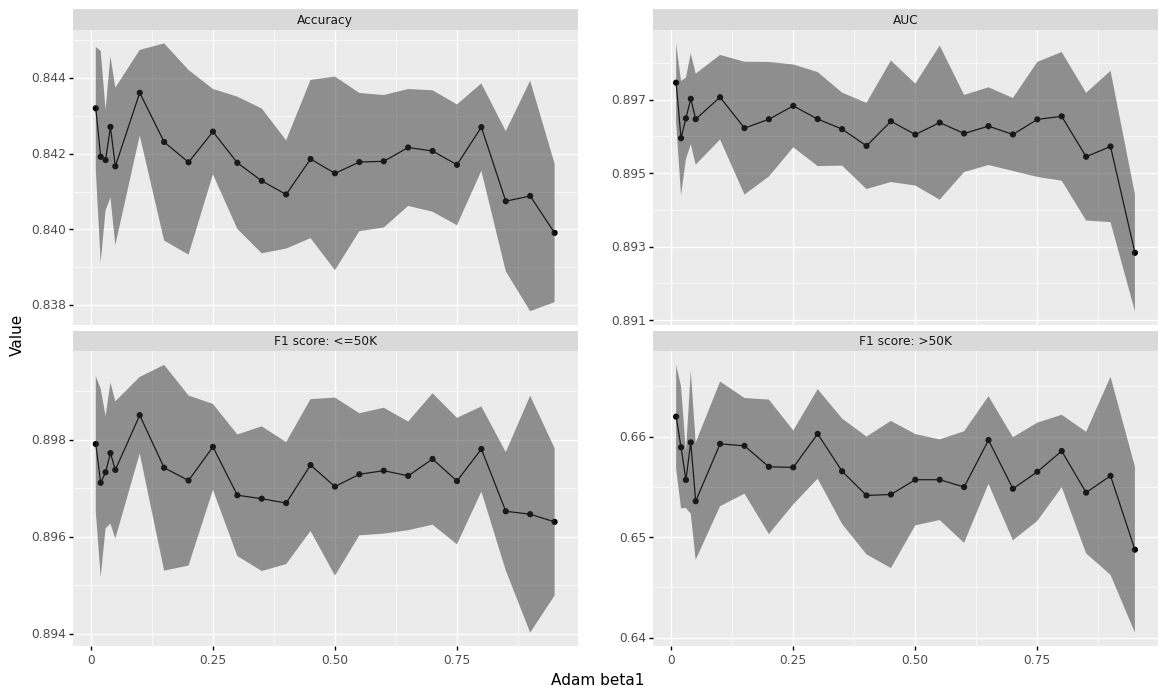

In [7]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [ ]:
result_adam_beta1

In [ ]:
from scipy.stats import beta
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a, b =  5,6
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0,1, 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')